# Persian/Arabic Alphabet

In [142]:
from google.colab import drive
drive.mount('/content/gdrive/')

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


In [143]:
import time
import random
import numpy as np
import keras
from keras.models import Model
from keras.layers import Flatten, Dense, Lambda, Input, Dropout, Conv2D, MaxPooling2D, BatchNormalization
from keras.optimizers import Adam, RMSprop, SGD, Nadam, Adagrad, AdamW, Adadelta, Adamax
from keras.losses import binary_crossentropy, Dice, BinaryFocalCrossentropy, Huber, SparseCategoricalCrossentropy
from keras.losses import CategoricalFocalCrossentropy, Poisson, CategoricalCrossentropy, KLDivergence
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint
import tensorflow.keras.backend as K

In [144]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
mloey1_ahcd1_path = kagglehub.dataset_download('mloey1/ahcd1')

print('Data source import complete.')


Data source import complete.


In [145]:
import os

# Print contents with full paths
print("Directory Contents with Full Paths:")
for file in os.listdir(mloey1_ahcd1_path):
    print(os.path.join(mloey1_ahcd1_path, file))


Directory Contents with Full Paths:
/root/.cache/kagglehub/datasets/mloey1/ahcd1/versions/2/csvTestLabel 3360x1.csv
/root/.cache/kagglehub/datasets/mloey1/ahcd1/versions/2/train images 13440x32x32
/root/.cache/kagglehub/datasets/mloey1/ahcd1/versions/2/arabic handwritten characters dataset csv
/root/.cache/kagglehub/datasets/mloey1/ahcd1/versions/2/Train Images 13440x32x32
/root/.cache/kagglehub/datasets/mloey1/ahcd1/versions/2/Train+Test Images Matlab.mat
/root/.cache/kagglehub/datasets/mloey1/ahcd1/versions/2/csvTestImages 3360x1024.csv
/root/.cache/kagglehub/datasets/mloey1/ahcd1/versions/2/csvTrainLabel 13440x1.csv
/root/.cache/kagglehub/datasets/mloey1/ahcd1/versions/2/Arabic Handwritten Characters Dataset CSV
/root/.cache/kagglehub/datasets/mloey1/ahcd1/versions/2/csvTrainImages 13440x1024.csv
/root/.cache/kagglehub/datasets/mloey1/ahcd1/versions/2/Test Images 3360x32x32
/root/.cache/kagglehub/datasets/mloey1/ahcd1/versions/2/test images 3360x32x32


In [146]:
import os
import pandas as pd

# Define the full path to the dataset files
mloey1_ahcd1_path = "/root/.cache/kagglehub/datasets/mloey1/ahcd1/versions/2"

# Load the CSV files using the full paths
x_train = pd.read_csv(os.path.join(mloey1_ahcd1_path, "csvTrainImages 13440x1024.csv"), header=None)
y_train = pd.read_csv(os.path.join(mloey1_ahcd1_path, "csvTrainLabel 13440x1.csv"), header=None, names=["label"], converters={'label': str})

x_test = pd.read_csv(os.path.join(mloey1_ahcd1_path, "csvTestImages 3360x1024.csv"), header=None)
y_test = pd.read_csv(os.path.join(mloey1_ahcd1_path, "csvTestLabel 3360x1.csv"), header=None, names=["label"], converters={'label': str})


In [147]:
# loading the dataset

# .astype(int).to_numpy() - 1
x_train = x_train
y_train = y_train.astype(int).to_numpy() - 1


x_test = x_test
y_test = y_test.astype(int).to_numpy() - 1

print("x_train.shape =", x_train.shape, "\ny_train.shape =", y_train.shape, "\nx_test.shape =", x_test.shape, "\ny_test.shape =", y_test.shape)

x_train.shape = (13440, 1024) 
y_train.shape = (13440, 1) 
x_test.shape = (3360, 1024) 
y_test.shape = (3360, 1)


In [148]:
arabic_characters = ['alef', 'beh', 'teh', 'theh', 'jeem', 'hah', 'khah', 'dal', 'thal',
                    'reh', 'zain', 'seen', 'sheen', 'sad', 'dad', 'tah', 'zah', 'ain',
                    'ghain', 'feh', 'qaf', 'kaf', 'lam', 'meem', 'noon', 'heh', 'waw', 'yeh']

(13440, 32, 32, 1) (3360, 32, 32, 1)


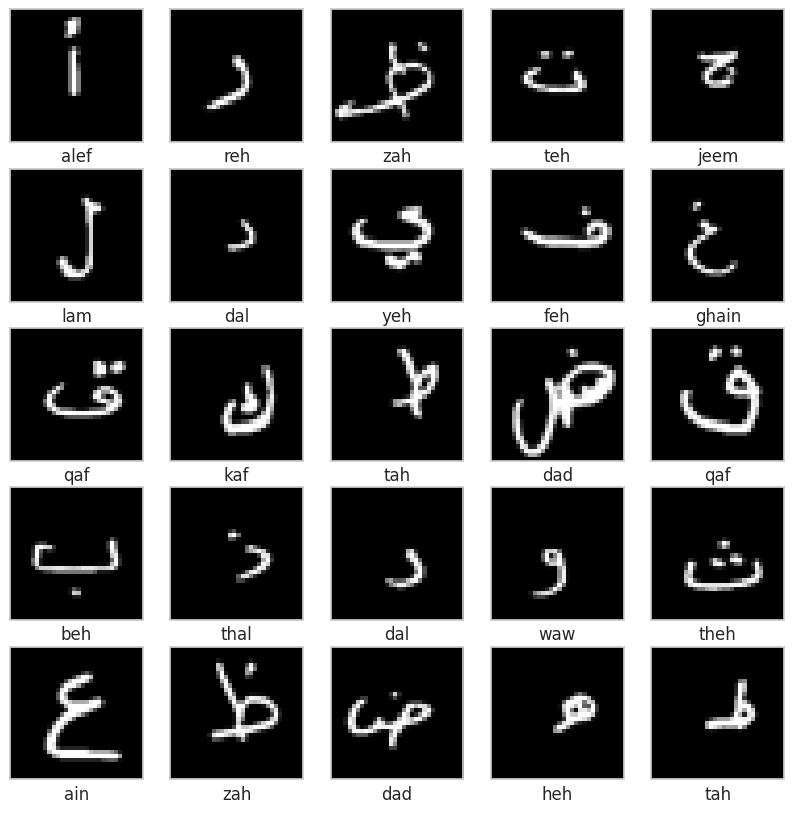

In [149]:
x_train = x_train.to_numpy().reshape(-1, 32, 32, 1)  # Reshape for training data
x_test = x_test.to_numpy().reshape(-1, 32, 32, 1)    # Reshape for test data

x_train = x_train / 255.0  # Normalize training data
x_test = x_test / 255.0    # Normalize test data

print(x_train.shape, x_test.shape)

ra = np.random.randint(0, 13440, size=25)
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train[ra[i]].reshape(32,32).T,"gray")
    plt.xlabel(arabic_characters[int(y_train[ra[i]][0])])
plt.show()


In [150]:
# Converting the class vector in integers to binary class matrix
from keras.utils import to_categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
print(y_train.shape, y_test.shape)
for i in zip(y_train[0], arabic_characters):
    print(i)


(13440, 28) (3360, 28)
(1.0, 'alef')
(0.0, 'beh')
(0.0, 'teh')
(0.0, 'theh')
(0.0, 'jeem')
(0.0, 'hah')
(0.0, 'khah')
(0.0, 'dal')
(0.0, 'thal')
(0.0, 'reh')
(0.0, 'zain')
(0.0, 'seen')
(0.0, 'sheen')
(0.0, 'sad')
(0.0, 'dad')
(0.0, 'tah')
(0.0, 'zah')
(0.0, 'ain')
(0.0, 'ghain')
(0.0, 'feh')
(0.0, 'qaf')
(0.0, 'kaf')
(0.0, 'lam')
(0.0, 'meem')
(0.0, 'noon')
(0.0, 'heh')
(0.0, 'waw')
(0.0, 'yeh')


In [151]:
X_train, X_test, Y_train, Y_test = x_train, x_test, y_train, y_test

In [152]:
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((13440, 32, 32, 1), (3360, 32, 32, 1), (13440, 28), (3360, 28))

In [153]:
import numpy as np
import tensorflow as tf

# Assuming X_train and X_test are your original datasets
# X_train.shape -> (41395, 30, 30, 1)
# X_test.shape -> (10349, 30, 30, 1)

# Resize images to 28x28
X_train_resized = tf.image.resize(X_train, (28, 28))
X_test_resized = tf.image.resize(X_test, (28, 28))

# Convert back to numpy arrays if needed
X_train_resized = X_train_resized.numpy()
X_test_resized = X_test_resized.numpy()

# Checking the new shapes
print(X_train_resized.shape)  # Should print (41395, 28, 28, 1)
print(X_test_resized.shape)   # Should print (10349, 28, 28, 1)

X_test, X_train =  X_test_resized,  X_train_resized


(13440, 28, 28, 1)
(3360, 28, 28, 1)


In [154]:
Y_train = np.argmax(Y_train, axis=1)
Y_test = np.argmax(Y_test, axis=1)
X_train.shape, Y_train.shape

((13440, 28, 28, 1), (13440,))

In [155]:
import time
import random
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Flatten, Dense, Lambda, Input, Dropout, Conv2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras.losses import BinaryCrossentropy, BinaryFocalCrossentropy
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint
from keras.optimizers import Adam, RMSprop, SGD, Nadam, Adagrad, AdamW, Adadelta, Adamax


In [156]:
import numpy as np

# Assuming X_train, X_test = train_images, test_images
# and Y_train, Y_test = train_labels, test_labels

# Shuffle the training data
indices = np.arange(X_test.shape[0])
np.random.shuffle(indices)
X_test = X_test[indices]
Y_test = Y_test[indices]

num =400

# Select 10,000 samples from the shuffled training data
X_test = X_test[:num]
Y_test = Y_test[:num]



X_test_p, Y_test_p= X_test, Y_test
# Check the shapes
print(f"Selected testing data shape: {X_test_p.shape}")
print(f"Selected testing labels shape: {Y_test_p.shape}")



Selected testing data shape: (400, 28, 28, 1)
Selected testing labels shape: (400,)


In [157]:

import numpy as np
from tensorflow.keras.datasets import mnist

# Load MNIST dataset
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

# Shuffle the training data
indices = np.arange(X_train.shape[0])
np.random.shuffle(indices)
X_train = X_train[indices]
Y_train = Y_train[indices]

X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)


# X_test= X_test.astype('float32')
# X_test/= 255
# X_test= X_test.reshape((len(X_test), np.prod(X_test.shape[1:])))
# X_test = X_test.reshape(-1, 28, 28, 1)

# # Limit the training data to 30,000 samples
# num= 40_000
# X_test_mn = X_train[:num]
# Y_test_mn = Y_train[:num]



X_train= X_train.astype('float32')
X_train/= 255
X_train= X_train.reshape((len(X_train), np.prod(X_train.shape[1:])))
X_train = X_train.reshape(-1, 28, 28, 1)

# Limit the training data to 30,000 samples
num= 45_000
X_train_mn = X_train[:num]
Y_train_mn = Y_train[:num]

# Check the shapes
print(f"Training data shape: {X_train_mn.shape}")
print(f"Training labels shape: {Y_train_mn.shape}")



Training data shape: (45000, 28, 28, 1)
Training labels shape: (45000,)


In [158]:
def make_pairs(x, y):
    if len(y.shape) > 1:
        y = np.argmax(y, axis=1)

    # Convert y to integers to ensure num_classes is calculated correctly
    y = y.astype(int)

    num_classes = y.max() + 1
    digit_indices = [np.where(y == i)[0] for i in range(num_classes)]

    pairs = []
    labels = []
    True_labels = []
    Indices = []
    for idx1 in range(len(x)):
        x1 = x[idx1]
        label1 = y[idx1]
        if digit_indices[label1].size:
            idx2 = np.random.choice(digit_indices[label1])
            x2 = x[idx2]
            pairs.append([x1, x2])
            labels.append(1)

        label2 = random.randint(0, num_classes - 1)
        while label2 == label1 or not digit_indices[label2].size:
            label2 = random.randint(0, num_classes - 1)
        idx2 = random.choice(digit_indices[label2])
        x2 = x[idx2]
        pairs.append([x1, x2])
        labels.append(0)

    # Convert lists to NumPy arrays
    return np.array(pairs), np.array(labels), np.array(True_labels), np.array(Indices)






In [159]:
# Make pairs
X_train, Y_train = X_train_mn, Y_train_mn
X_test, Y_test = X_test_p, Y_test_p


pairs_train, labels_train, true_label_train,  indices_train= make_pairs(X_train, Y_train)
pairs_test, labels_test, true_label_test, indices_test = make_pairs(X_test, Y_test)

# X_test.shape, Y_test.shape



In [160]:
# Hyperparameters
epochs =3
learning_rate = 0.001
batch_size = 32
# Set random seed for reproducibility
tf.random.set_seed(42)


In [161]:
def euclidean_distance(Vects):
    x, y = Vects
    sum_square = tf.keras.backend.sum(tf.keras.backend.square(x - y), axis=1, keepdims=True)
    return tf.keras.backend.sqrt(tf.keras.backend.maximum(sum_square, tf.keras.backend.epsilon()))



def create_siamese_model(input_shape, optimizer, loss_function, activation_functions):
    input = Input(input_shape)

    # Convolutional layers for feature extraction
    x = Conv2D(256, (9, 9), activation=activation_functions[0])(input)
    x = MaxPooling2D((2, 2))(x)
    x = Dropout(0.1)(x)
    x = Conv2D(256, (3, 3), activation=activation_functions[1])(x)
    x = MaxPooling2D((2, 2))(x)
    x = Conv2D(256, (3, 3), activation=activation_functions[2])(x)
    x = MaxPooling2D((2, 2))(x)
    x = BatchNormalization()(x)
    x = Flatten()(x)
    x = Dense(128, activation=activation_functions[3])(x)

    # Fully connected layers
    dense = Model(input, x)

    input1 = Input(input_shape)
    input2 = Input(input_shape)

    dense1 = dense(input1)
    dense2 = dense(input2)

    # Calculate the Euclidean distance between the dense layers
    distance = Lambda(euclidean_distance, output_shape=lambda x: (1,))([dense1, dense2])
    distance = Flatten()(distance)
    dense_layer = Dense(1, activation='sigmoid')(distance)
    model = Model(inputs=[input1, input2], outputs=dense_layer)
    model.compile(loss=loss_function, optimizer=optimizer, metrics=['accuracy'])
    return model


In [162]:
import random
import time
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt


from tensorflow.keras import backend as K

from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

from tensorflow.keras.models import Model
from tensorflow.keras.layers import (
    Flatten, Dense, Lambda, Input, Dropout, Conv2D, MaxPooling2D,
    BatchNormalization, LSTM, SimpleRNNCell, Reshape, GRU, Bidirectional
)
from tensorflow.keras.optimizers import Adam, RMSprop, Nadam, Lion, Ftrl, RMSprop
from tensorflow.keras.losses import BinaryCrossentropy, BinaryFocalCrossentropy, Huber
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint


import time
import random
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Flatten, Dense, Lambda, Input, Dropout, Conv2D, MaxPooling2D, BatchNormalization, AveragePooling2D
from tensorflow.keras.optimizers import Adam, RMSprop, SGD, Nadam, Adagrad, AdamW, Adadelta, Adamax
from tensorflow.keras.losses import binary_crossentropy, BinaryFocalCrossentropy
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint



In [163]:
import time
import random
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Flatten, Dense, Lambda, Input, Dropout, Conv2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras.losses import BinaryCrossentropy, BinaryFocalCrossentropy
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint
from keras.optimizers import Adam, RMSprop, SGD, Nadam, Adagrad, AdamW, Adadelta, Adamax


In [164]:
# Hyperparameters
epochs =3
learning_rate = 0.001
batch_size = 32
# Set random seed for reproducibility
tf.random.set_seed(42)



 ****************************************************************************** 

(45000, 28, 28, 1) (45000,) (400, 28, 28, 1) (400,)
Training with optimizer, loss function, activation functions, and batch size: (adam, BC, ['elu', 'elu', 'elu', 'relu'], batch size=32)
Epoch 1/3
2532/2532 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.4886 - loss: 0.8251
Epoch 1: val_accuracy improved from -inf to 0.50000, saving model to /content/gdrive/MyDrive/MNIST/best6000_model_adam_BC_elu_elu_elu_relu_bs32.keras
2532/2532 ━━━━━━━━━━━━━━━━━━━━ 31s 11ms/step - accuracy: 0.4886 - loss: 0.8250 - val_accuracy: 0.5000 - val_loss: 0.6932 - learning_rate: 0.0010
Epoch 2/3
2530/2532 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5025 - loss: 0.6932
Epoch 2: val_accuracy did not improve from 0.50000
2532/2532 ━━━━━━━━━━━━━━━━━━━━ 38s 11ms/step - accuracy: 0.5025 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6931 - learning_rate: 0.0010
Epoch 3/3
2527/2532 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


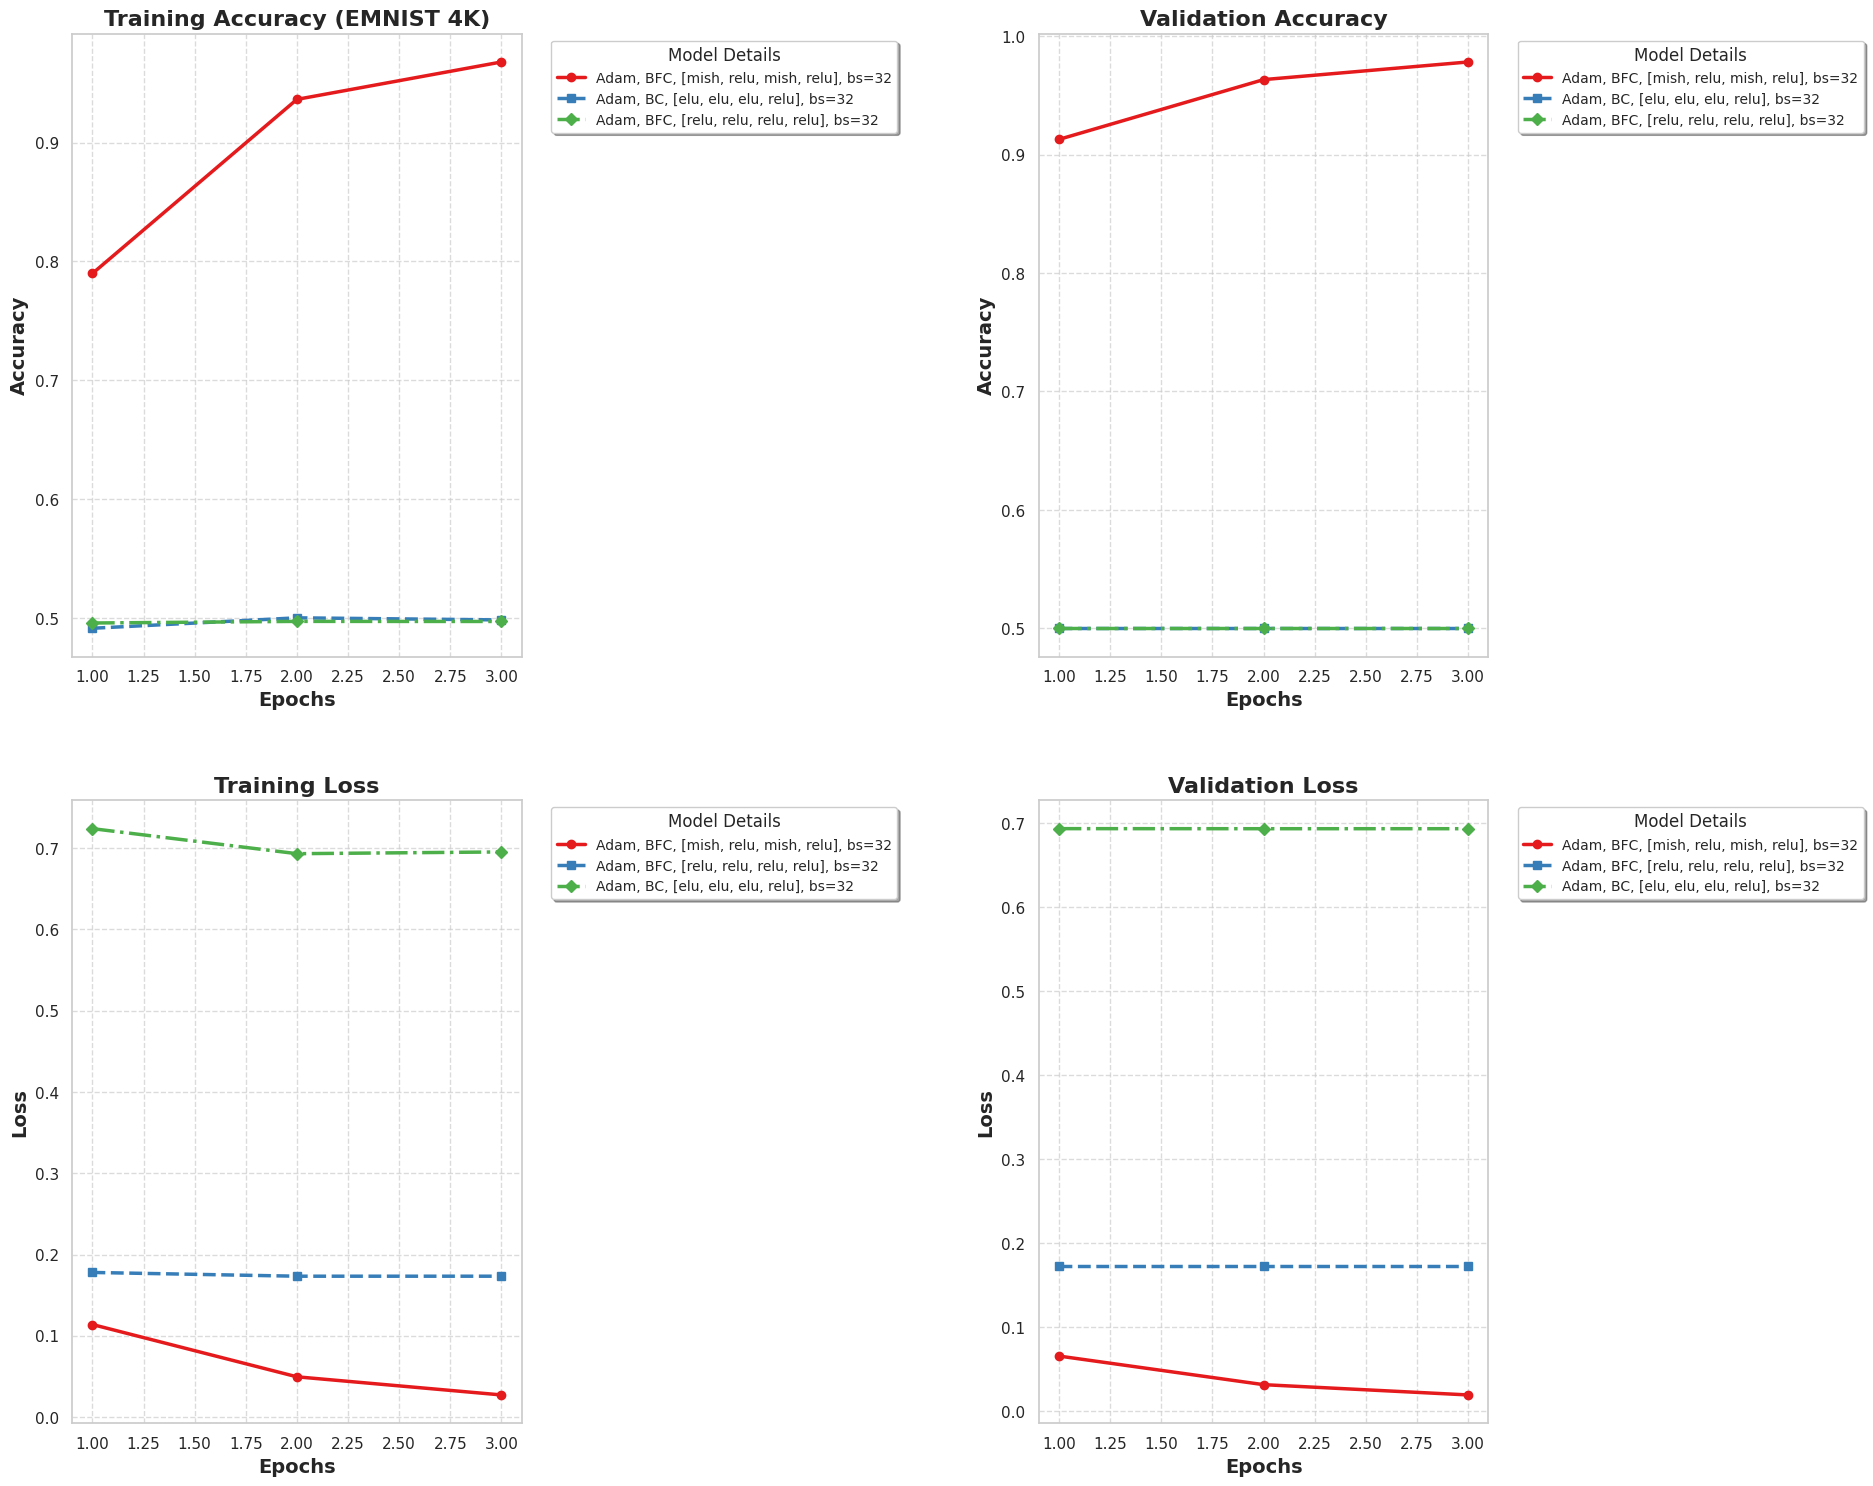

In [165]:
# Main code
print('\n ****************************************************************************** \n')

print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)

# # Make pairs
# pairs_train, labels_train = make_pairs(X_train, Y_train)
# pairs_test, labels_test = make_pairs(X_test, Y_test)






# Define the three models
# Define the three models
models_configurations = [

    {'optimizer': Adam(learning_rate=learning_rate), 'loss_function': BinaryCrossentropy(), 'activation_functions': ['elu', 'elu', 'elu', 'relu'], 'loss_name_abbrev': 'BC'},
    {'optimizer': Adam(learning_rate=learning_rate), 'loss_function': BinaryFocalCrossentropy(), 'activation_functions': ['mish', 'relu', 'mish', 'relu'], 'loss_name_abbrev': 'BFC'},
    # {'optimizer': Adam(learning_rate=learning_rate), 'loss_function': BinaryFocalCrossentropy(), 'activation_functions': ['mish', 'tanh', 'mish', 'relu'], 'loss_name_abbrev': 'BFC'},
    {'optimizer': Adam(learning_rate=learning_rate), 'loss_function': BinaryFocalCrossentropy(), 'activation_functions': ['relu', 'relu', 'relu', 'relu'], 'loss_name_abbrev': 'BFC'},
    # {'optimizer': Nadam(learning_rate=learning_rate), 'loss_function':  BinaryFocalCrossentropy(), 'activation_functions': ['tanh', 'relu', 'tanh', 'relu'], 'loss_name_abbrev': 'BFC'},
    # {'optimizer': Nadam(learning_rate=learning_rate), 'loss_function':  BinaryFocalCrossentropy(), 'activation_functions': ['elu', 'elu', 'elu', 'relu'], 'loss_name_abbrev': 'BFC'},



]






# Initialize results tracking
results = []
precision_recall_f1 = []
histories = []
j = 1  # Initialize the run counter


for config in models_configurations:
    optimizer = config['optimizer']
    loss_function = config['loss_function']
    activation_functions = config['activation_functions']
    loss_name_abbrev = config['loss_name_abbrev']
    batch_size = batch_size

    print(f"Training with optimizer, loss function, activation functions, and batch size: "
          f"({optimizer.get_config()['name']}, {loss_name_abbrev}, {activation_functions}, batch size={batch_size})")

    # Create the model
    model = create_siamese_model(input_shape=(28, 28, 1), optimizer=optimizer, loss_function=loss_function, activation_functions=activation_functions)

    filepath = f'/content/gdrive/MyDrive/MNIST/best6000_model_{optimizer.get_config()["name"]}_{loss_name_abbrev}_{"_".join(activation_functions)}_bs{batch_size}.keras'
    checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
    reduce_lr_loss = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=3, verbose=1, min_delta=1e-4, mode='min')
    early_stopping = EarlyStopping(monitor='val_loss', patience=10, verbose=1, restore_best_weights=True)

    # Start timing before model training
    start_time = time.time()

    # Train the model
    history = model.fit([pairs_train[:, 0], pairs_train[:, 1]], labels_train,
                        batch_size=batch_size, epochs=epochs,
                        callbacks=[checkpoint, reduce_lr_loss, early_stopping], validation_split=0.1)





    # Stop timing after training
    end_time = time.time()

    # Calculate total runtime and average epoch time
    runtime = end_time - start_time
    avg_epoch_time = runtime / epochs

    print(f"Total Runtime: {runtime:.2f} seconds")
    print(f"Average Epoch Time: {avg_epoch_time:.2f} seconds")

    model.load_weights(filepath)

    predictions = model.predict([pairs_test[:, 0], pairs_test[:, 1]])
    y_pred = (predictions > 0.5).astype(int).flatten()

    precision = precision_score(labels_test, y_pred)
    recall = recall_score(labels_test, y_pred)
    f1 = f1_score(labels_test, y_pred)
    accuracy = accuracy_score(labels_test, y_pred)

    # Append results to the results list
    results.append((optimizer.get_config()['name'], loss_name_abbrev, activation_functions,
                    accuracy,  # Test Accuracy
                    history.history.get('val_accuracy', [0])[-1],   # Validation Accuracy
                    history.history.get('accuracy', [0])[-1],       # Training Accuracy
                    history.history.get('loss', [0])[-1],            # Training Loss
                    history.history.get('val_loss', [0])[-1],        # Validation Loss
                    model.evaluate([pairs_test[:, 0], pairs_test[:, 1]], labels_test)[0],  # Test Loss
                    ))

    # Append detailed information including runtime and average epoch time
    precision_recall_f1.append((
        optimizer.get_config()['name'],       # Optimizer name
        loss_name_abbrev,                     # Loss function abbreviation
        activation_functions,                 # Activation functions
        batch_size,                           # Batch size
        accuracy,                             # Accuracy
        precision,                            # Precision
        recall,                               # Recall
        f1,                                   # F1-score
        runtime,                              # Runtime
        avg_epoch_time                        # Average epoch time
    ))

    histories.append((optimizer.get_config()['name'], loss_name_abbrev, activation_functions, batch_size, history, runtime, avg_epoch_time))

    print(f'We are in run: {j}')
    j += 1
    print('\n ****************************************************************************** \n')

def capitalize_optimizer_name(name):
    return name.capitalize()






# Table1
###########################################################################
# # 1. Update model configurations to ensure all models are included
# model_configs = {
#     # 1: ("Adam", "BC", "[tanh, elu, elu, relu, relu]"),
#     1: ("Lion", "H", "[selu, elu, elu, elu, relu]"),
#     2: ("Lion", "H", "[tanh, tanh, selu, tanh, selu]"),
#     3: ("Adam", "BFC", "[tanh, mish, relu, mish, relu]"),
#     4: ("Adam", "BFC", "[relu, relu, relu, relu, relu]"),
#     5: ("Nadam", "BC", "[tanh, tanh, selu, tanh, selu]"),
#     6: ("RMSprop", "BFC", "[selu, elu, elu, elu, relu]"),
#     7: ("Nadam", "H", "[selu, elu, elu, elu, relu]"),
#     8: ("Adam", "CL", "[relu, relu, relu, relu, relu]"),  # CL Model



# 1. Update model configurations to ensure all models are included
import seaborn as sns
import matplotlib.pyplot as plt

# # Model configurations

model_configs = {
    1: ("Adam", "BC", "[elu, elu, elu, relu]"),
    2: ("Adam", "BFC", "[mish, relu, mish, relu]"),
    3: ("Adam", "BFC", "[relu, relu, relu, relu]"),
    4: ("Nadam", "BFC", "[tanh, relu, tanh, relu]"),
    5: ("Nadam", "BFC", "[elu, elu, elu, relu]")
}












# Table 1: Generating LaTeX table for accuracy, losses
############################################################################


# 2. Normalize the configuration and create a mapping
def normalize_config(config):
    return str(config).replace("'", "").replace(",]", "]").replace("[,", "[").replace(",[", "[").lower()

# Create a reverse mapping from config to model number
config_to_model_number = {normalize_config(v): k for k, v in model_configs.items()}

# Define a function to create a unique identifier for each model based on its configuration
def get_model_identifier(config):
    return normalize_config(config)

# 3. Handle unknown model cases in LaTeX generation
def get_model_number(config):
    config_str = normalize_config(config)
    model_number = config_to_model_number.get(config_str, "Unknown")
    if model_number == "Unknown":
        print(f"Warning: Unknown model configuration for {config}")
    return model_number

#####################################################################################################################################################################3

print('##################################Table 1:########################################################')
# Sort results based on test accuracy
# # Sort precision_recall_f1 based on accuracy

precision_recall_f1_sorted = sorted(precision_recall_f1, key=lambda x: x[4], reverse=True)



results_sorted_for_accuracy = sorted(results, key=lambda x: x[3], reverse=True)

# Define the LaTeX table header and footer for accuracy, runtime, and losses
table_header_runtime = "\\begin{table}[h!]\n\\centering\n\\resizebox{1.27\\textwidth}{!}{\\begin{tabular}{|c|c|c|c|c|c|c|c|c|c|c|c|}\n\\hline\n"
table_header_runtime += "Model & Optimizer & Loss Function & Activation Function & Test Accuracy (\\%) & Val Accuracy (\\%) & Train Accuracy (\\%) & Train Loss (\\%) & Val Loss (\\%) & Test Loss (\\%) & Run Time (s) & Avg Run Time/Epoch (s) \\\\\n\\hline\n"
table_footer_runtime = "\\end{tabular}}\n\\caption{Test, Validation, and Training accuracies (in \\%) along with losses and runtime for various models.}\n\\label{tab:accuracy_runtime}\n\\end{table}"

# Create LaTeX table rows for accuracy, losses, runtime, and average epoch time
table_rows_runtime = ""
for result in results_sorted_for_accuracy:
    optimizer_name = result[0].capitalize()
    activation_functions_str = normalize_config(result[2])
    config = (result[0].lower(), result[1].lower(), activation_functions_str)
    model_identifier = normalize_config(config)
    model_number = config_to_model_number.get(model_identifier, "Unknown")

    # Safely access elements of the result tuple
    test_accuracy = result[3] * 100 if len(result) > 3 else 0.0
    val_accuracy = result[4] * 100 if len(result) > 4 else 0.0
    train_accuracy = result[5] * 100 if len(result) > 5 else 0.0

    # Get losses
    train_loss = result[6] * 100 if len(result) > 6 else 0.0
    val_loss = result[7] * 100 if len(result) > 7 else 0.0
    test_loss = result[8] * 100 if len(result) > 8 else 0.0

    # Get runtime and avg epoch time from the precision_recall_f1_sorted table
    prf_result = next((item for item in precision_recall_f1_sorted
                       if item[0] == result[0] and item[1] == result[1] and item[2] == result[2]), None)
    run_time = prf_result[8] if prf_result and len(prf_result) > 8 else 0.0
    avg_run_time_per_epoch = prf_result[9] if prf_result and len(prf_result) > 9 else 0.0

    # Generate table rows
    table_rows_runtime += (
        f"Model {model_number} & {optimizer_name} & {result[1]} & {activation_functions_str} & "
        f"{test_accuracy:.2f} & {val_accuracy:.2f} & {train_accuracy:.2f} & "
        f"{train_loss:.2f} & {val_loss:.2f} & {test_loss:.2f} & "
        f"{run_time:.2f} & {avg_run_time_per_epoch:.2f} \\\\\n"
    )

# Combine header, rows, and footer to create the final LaTeX table for accuracy, losses, and runtime
latex_table_runtime = table_header_runtime + table_rows_runtime + "\\hline\n" + table_footer_runtime
print(latex_table_runtime)




#Generating LaTeX table for Precision, Recall, F1-score
print('##################################Table 2:########################################################')

# # Sort precision_recall_f1 based on precision (index 5) or any other metric you prefer
# precision_recall_f1_sorted = sorted(precision_recall_f1, key=lambda x: x[5], reverse=True)

# table_rows_prf = ""
# for result in precision_recall_f1_sorted:
#     optimizer_name = result[0].capitalize()  # Capitalize optimizer name
#     activation_functions_str = normalize_config(result[2])  # Normalize activation function string
#     config = (result[0].lower(), result[1].lower(), activation_functions_str)
#     model_number = get_model_number(config)

#     # Construct the table rows without Accuracy and Batch Size
#     table_rows_prf += (
#         f"Model {model_number} & {optimizer_name} & {result[1]} & {activation_functions_str} & "
#         f"{result[5] * 100:.2f} & {result[6] * 100:.2f} & {result[7] * 100:.2f} \\\\\n"
#     )

# # LaTeX table header and footer for Precision, Recall, and F1-Score
# table_header_prf = (
#     "\\begin{table}[h!]\n\\centering\n\\resizebox{1.27\\textwidth}{!}{\\begin{tabular}{|c|c|c|c|c|c|c|}\n\\hline\n"
#     "Model & Optimizer & Loss Function & Activation Function & Precision (\\%) & Recall (\\%) & F1-Score (\\%) \\\\\n\\hline\n"
# )
# table_footer_prf = (
#     "\\end{tabular}}\n\\caption{Precision, Recall, and F1-Score (in \\%) for various models.}\n\\label{tab:precision_recall_f1}\n\\end{table}"
# )

# # Combine header, rows, and footer to create the final LaTeX table for Precision, Recall, and F1-Score
# latex_table_prf = table_header_prf + table_rows_prf + "\\hline\n" + table_footer_prf
# print(latex_table_prf)



# Sorting precision_recall_f1 based on Test Accuracy (index 4 in the results list, modify index as per your structure)
precision_recall_f1_sorted_by_accuracy = sorted(precision_recall_f1, key=lambda x: x[4], reverse=True)

# Generating table rows for Precision, Recall, and F1-Score sorted by Test Accuracy
table_rows_prf = ""
for result in precision_recall_f1_sorted_by_accuracy:
    optimizer_name = result[0].capitalize()  # Capitalize optimizer name
    activation_functions_str = normalize_config(result[2])  # Normalize activation function string
    config = (result[0].lower(), result[1].lower(), activation_functions_str)
    model_number = get_model_number(config)

    # Construct the table rows, keeping them ordered by accuracy
    table_rows_prf += (
        f"Model {model_number} & {optimizer_name} & {result[1]} & {activation_functions_str} & "
        f"{result[5] * 100:.2f} & {result[6] * 100:.2f} & {result[7] * 100:.2f} \\\\\n"
    )

# LaTeX table header and footer for Precision, Recall, and F1-Score
table_header_prf = (
    "\\begin{table}[h!]\n\\centering\n\\resizebox{1.27\\textwidth}{!}{\\begin{tabular}{|c|c|c|c|c|c|c|}\n\\hline\n"
    "Model & Optimizer & Loss Function & Activation Function & Precision (\\%) & Recall (\\%) & F1-Score (\\%) \\\\\n\\hline\n"
)
table_footer_prf = (
    "\\end{tabular}}\n\\caption{Precision, Recall, and F1-Score (in \\%) sorted by Test Accuracy for various models.}\n\\label{tab:precision_recall_f1_sorted_by_accuracy}\n\\end{table}"
)

# Combine header, rows, and footer to create the final LaTeX table
latex_table_prf_sorted_by_accuracy = table_header_prf + table_rows_prf + "\\hline\n" + table_footer_prf
print(latex_table_prf_sorted_by_accuracy)



# Table 3: Generating LaTeX table for Precision, Recall, F1-score (With batchsize an Accuracy)
print('##################################Table 3:########################################################')

# # Sort precision_recall_f1 based on accuracy
precision_recall_f1_sorted = sorted(precision_recall_f1, key=lambda x: x[4], reverse=True)

table_rows_prf = ""
for result in precision_recall_f1_sorted:
    optimizer_name = result[0].capitalize()  # Capitalize optimizer name
    activation_functions_str = normalize_config(result[2])  # Normalize activation function string
    config = (result[0].lower(), result[1].lower(), activation_functions_str)
    model_number = get_model_number(config)

    # Safely access elements of the result tuple
    table_rows_prf += (
        f"Model {model_number} & {optimizer_name} & {result[1]} & {activation_functions_str} & "
        f"{result[3]} & {result[4] * 100:.2f} & {result[5] * 100:.2f} & "
        f"{result[6] * 100:.2f} & {result[7] * 100:.2f} \\\\\n"
    )

# LaTeX table header and footer for precision, recall, and F1-score
table_header_prf = (
    "\\begin{table}[h!]\n\\centering\n\\resizebox{1.27\\textwidth}{!}{\\begin{tabular}{|c|c|c|c|c|c|c|c|c|}\n\\hline\n"
    "Model & Optimizer & Loss Function & Activation Function & Batch Size & Accuracy (\\%) & Precision (\\%) & Recall (\\%) & F1-Score (\\%) \\\\\n\\hline\n"
)
table_footer_prf = (
    "\\end{tabular}}\n\\caption{Accuracy, Precision, Recall, and F1-Score (in \\%) for various models.}\n\\label{tab:accuracy_precision_recall_f1}\n\\end{table}"
)

# Combine header, rows, and footer to create the final LaTeX table for precision, recall, and F1-score
latex_table_prf = table_header_prf + table_rows_prf + "\\hline\n" + table_footer_prf
print(latex_table_prf)

###########################################################################################################################################################################



print('################################## Plots ########################################################')

# #Plots
#################################################################
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Use a seaborn style for better aesthetics
sns.set(style="whitegrid")

# Define colors for plot lines
plot_colors = sns.color_palette("Set1", 8)  # Increased palette size to accommodate more lines

# Define line styles and markers
line_styles = ['-', '--', '-.', ':']       # Different line styles for variety
markers = ['o', 's', 'D', '^', 'v', '<', '>', 'p']  # Expanded markers list


# Sort histories based on different metrics for each subplot
histories_sorted_train_acc = sorted(histories, key=lambda x: max(x[4].history.get('accuracy', [0])), reverse=True)
histories_sorted_val_acc = sorted(histories, key=lambda x: max(x[4].history.get('val_accuracy', [0])), reverse=True)
histories_sorted_train_loss = sorted(histories, key=lambda x: min(x[4].history.get('loss', [np.inf])))
histories_sorted_val_loss = sorted(histories, key=lambda x: min(x[4].history.get('val_loss', [np.inf])))

# Create subplots with transparent background
fig, axs = plt.subplots(2, 2, figsize=(20, 16), facecolor='none')

# Plot configurations for each subplot
plot_configs = [
    ('Training Accuracy (EMNIST 4K)', histories_sorted_train_acc, 'accuracy', 'Model Details'),
    ('Validation Accuracy', histories_sorted_val_acc, 'val_accuracy', 'Model Details'),
    ('Training Loss', histories_sorted_train_loss, 'loss', 'Model Details'),
    ('Validation Loss', histories_sorted_val_loss, 'val_loss', 'Model Details')
]

# Iterate through each subplot configuration
for ax, (title, sorted_histories, metric, legend_title) in zip(axs.flatten(), plot_configs):

    for i, (optimizer, loss_function, activation_functions, batch_size, history, train_metric, val_metric) in enumerate(sorted_histories):
        color = plot_colors[i % len(plot_colors)]         # Cycle through colors
        line_style = line_styles[i % len(line_styles)]    # Cycle through line styles
        marker = markers[i % len(markers)]                # Cycle through markers

        # Modify activation functions string to be enclosed in brackets
        activation_func_str = '[' + ', '.join(activation_functions) + ']'
        label_str = f'{optimizer.capitalize()}, {loss_function}, {activation_func_str}, bs={batch_size}'

        # Extract metric data with default empty list if not present
        metric_data = history.history.get(metric, [])

        # Plot the metric, adjusting for epoch starting at 1
        ax.plot(range(1, len(metric_data) + 1), metric_data, label=label_str,
                color=color, linestyle=line_style, linewidth=2.5,
                marker=marker, markersize=6)

    # Set titles and labels
    ax.set_title(title, fontsize=16, fontweight='bold')
    ax.set_xlabel('Epochs', fontsize=14, fontweight='bold')
    ax.set_ylabel('Accuracy' if 'Accuracy' in title else 'Loss', fontsize=14, fontweight='bold')

    # Enable grid
    ax.grid(True, linestyle='--', alpha=0.7)

    # Position legend outside the plot
    ax.legend(loc='upper left', bbox_to_anchor=(1.05, 1), fontsize=10, title=legend_title, shadow=True)

# Adjust layout for better spacing
plt.tight_layout(pad=4.0)

# Display the plots
plt.show()


#######################################################



/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 26 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


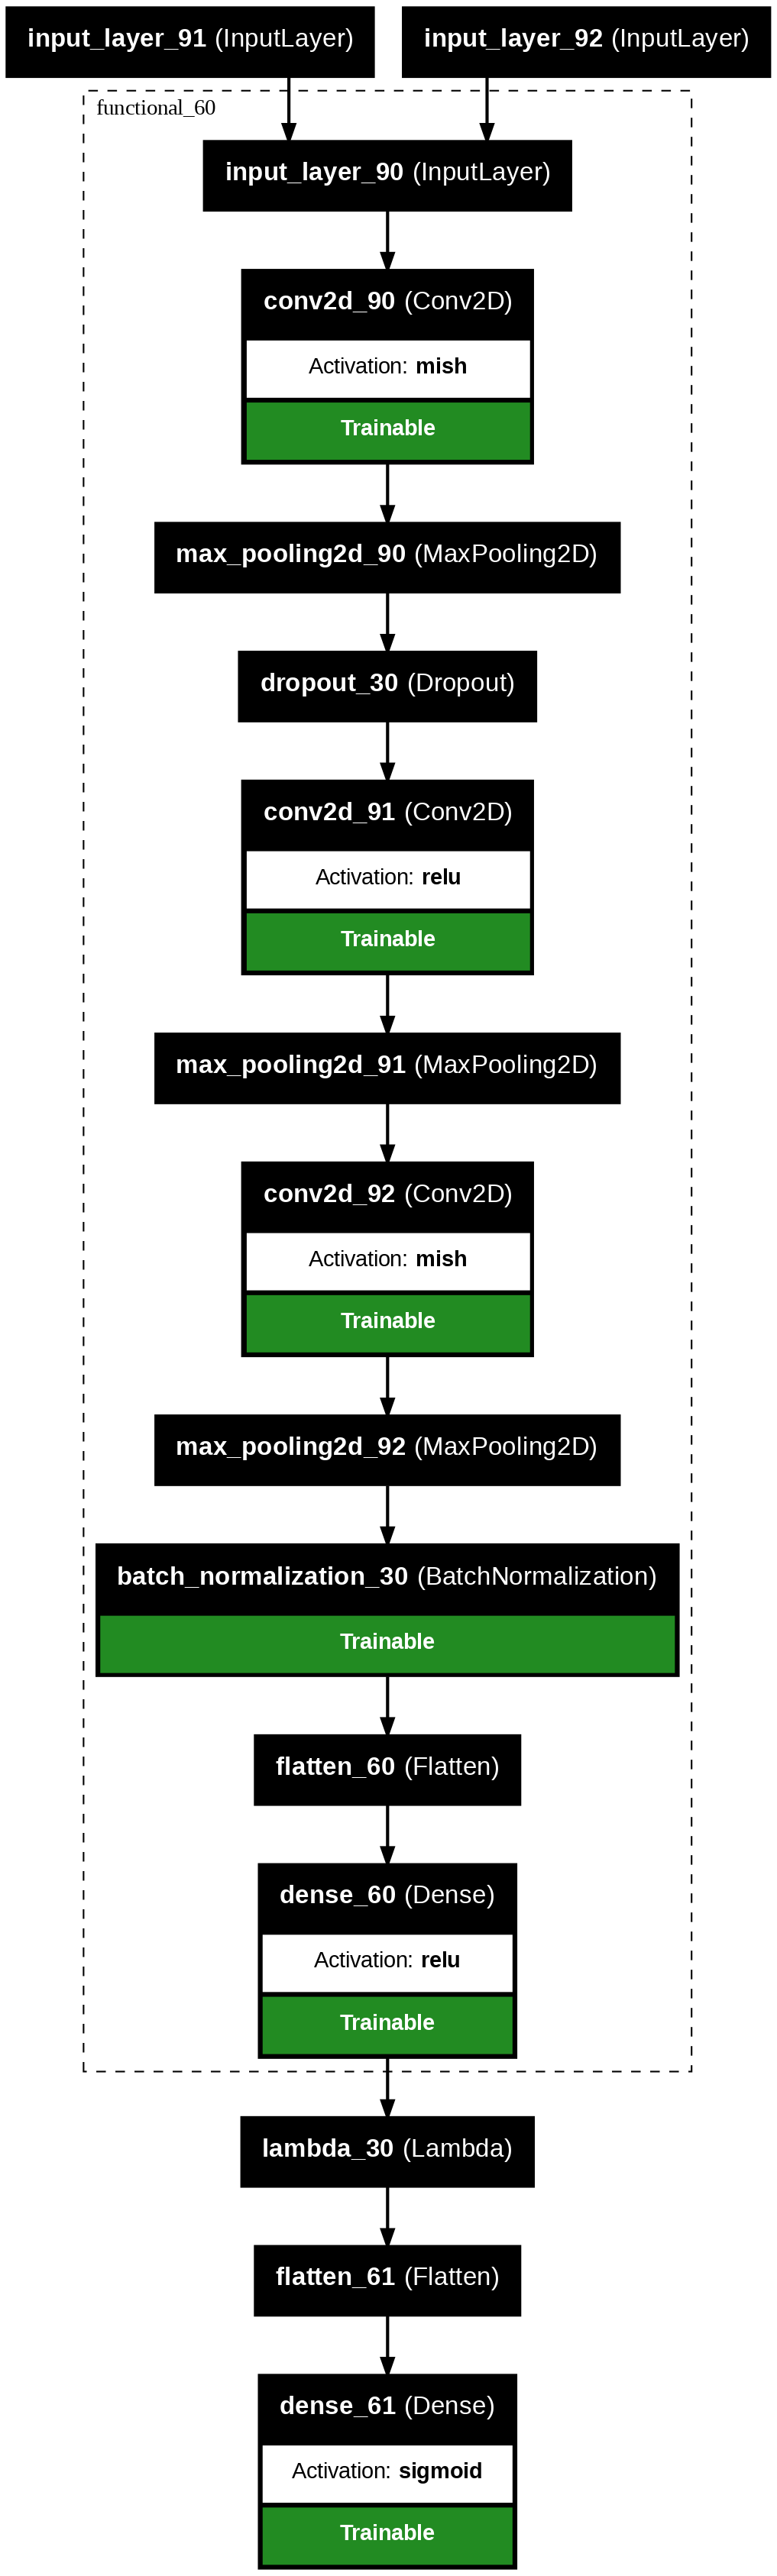

In [198]:
import time
import random
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import backend as K
from tensorflow.keras.models import Model
from tensorflow.keras.layers import (
    Flatten, Dense, Lambda, Input, Dropout, Conv2D, MaxPooling2D, BatchNormalization,
    LSTM, SimpleRNNCell, Reshape, GRU, Bidirectional
)
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras.losses import BinaryCrossentropy, BinaryFocalCrossentropy
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from keras.models import Sequential


# Hyperparameters
epochs = 40
learning_rate = 0.001
batch_size =32

# Set random seed for reproducibility
tf.random.set_seed(42)



import numpy as np
from tensorflow.keras.datasets import mnist


def euclidean_distance(Vects):
    x, y = Vects
    sum_square = tf.keras.backend.sum(tf.keras.backend.square(x - y), axis=1, keepdims=True)
    return tf.keras.backend.sqrt(tf.keras.backend.maximum(sum_square, tf.keras.backend.epsilon()))



def make_pairs(x, y):
    if len(y.shape) > 1:
        y = np.argmax(y, axis=1)

    num_classes = y.max() + 1
    digit_indices = [np.where(y == i)[0] for i in range(num_classes)]

    pairs = []
    labels = []
    True_labels = []
    Indices = []
    for idx1 in range(len(x)):
        x1 = x[idx1]
        label1 = y[idx1]
        if digit_indices[label1].size:
            idx2 = np.random.choice(digit_indices[label1])
            x2 = x[idx2]
            pairs.append([x1, x2])
            labels.append(1)

        label2 = random.randint(0, num_classes - 1)
        while label2 == label1 or not digit_indices[label2].size:
            label2 = random.randint(0, num_classes - 1)
        idx2 = random.choice(digit_indices[label2])
        x2 = x[idx2]
        pairs.append([x1, x2])
        labels.append(0)

    # Convert lists to NumPy arrays
    return np.array(pairs), np.array(labels), np.array(True_labels), np.array(Indices)





# Make pairs

# pairs_train, labels_train, true_label_train,  indices_train= make_pairs(X_train, Y_train)
pairs_test, labels_test, true_label_test, indices_test = make_pairs(X_test, Y_test)





def create_siamese_model(input_shape, optimizer, loss_function, activation_functions):
    input = Input(input_shape)

    # Convolutional layers for feature extraction
    x = Conv2D(256, (9, 9), activation=activation_functions[0])(input)
    x = MaxPooling2D((2, 2))(x)
    x = Dropout(0.1)(x)
    x = Conv2D(256, (3, 3), activation=activation_functions[1])(x)
    x = MaxPooling2D((2, 2))(x)
    x = Conv2D(256, (3, 3), activation=activation_functions[2])(x)
    x = MaxPooling2D((2, 2))(x)
    x = BatchNormalization()(x)
    x = Flatten()(x)
    x = Dense(128, activation=activation_functions[3])(x)

    # Fully connected layers
    dense = Model(input, x)

    input1 = Input(input_shape)
    input2 = Input(input_shape)

    dense1 = dense(input1)
    dense2 = dense(input2)

    # Calculate the Euclidean distance between the dense layers
    distance = Lambda(euclidean_distance, output_shape=lambda x: (1,))([dense1, dense2])
    distance = Flatten()(distance)
    dense_layer = Dense(1, activation='sigmoid')(distance)
    model = Model(inputs=[input1, input2], outputs=dense_layer)
    model.compile(loss=loss_function, optimizer=optimizer, metrics=['accuracy'])
    return model




# def make_pairs(x, y):
#     if len(y.shape) > 1:
#         y = np.argmax(y, axis=1)

#     num_classes = y.max() + 1
#     digit_indices = [np.where(y == i)[0] for i in range(num_classes)]

#     pairs = []
#     labels = []

#     for idx1 in range(len(x)):
#         x1 = x[idx1]
#         label1 = y[idx1]
#         if digit_indices[label1].size:
#             idx2 = np.random.choice(digit_indices[label1])
#             x2 = x[idx2]
#             pairs.append([x1, x2])
#             labels.append(1)

#         label2 = random.randint(0, num_classes - 1)
#         while label2 == label1 or not digit_indices[label2].size:
#             label2 = random.randint(0, num_classes - 1)
#         idx2 = random.choice(digit_indices[label2])
#         x2 = x[idx2]
#         pairs.append([x1, x2])
#         labels.append(0)

#     return np.array(pairs), np.array(labels)

# Load the best model
def load_best_model(optimizer_instance, loss_function, input_shape, activation_functions, batch_size):
    optimizer_name = optimizer_instance.get_config()["name"]

    # Map the loss function to its abbreviation
    loss_name_mapping = {
        'BinaryFocalCrossentropy': 'BFC',
        'BinaryCrossentropy': 'BC',
        'Huber':  'H'
    }
    loss_name = loss_function.__class__.__name__
    loss_name_abbrev = loss_name_mapping.get(loss_name, 'function')

    # Prepare the filepath using the optimizer instance's configuration
    filepath = f'/content/gdrive/MyDrive/MNIST/best6000_model_{optimizer_instance.get_config()["name"]}_{loss_name_abbrev}_{"_".join(activation_functions)}_bs{batch_size}.keras'

    # Create the model
    model = create_siamese_model(input_shape, optimizer_instance, loss_function, activation_functions)

    if model is None:
        raise ValueError("create_siamese_model did not return a valid model.")

    # Load the weights
    model.load_weights(filepath)

    return model

# # Main code
# print('\n ****************************************************************************** \n')

# print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)

# # Make pairs
# pairs_train, labels_train = make_pairs(X_train, Y_train)
# pairs_test, labels_test = make_pairs(X_test, Y_test)



# Example usage to load the best model
optimizer =Adam(learning_rate=0.001)
# loss_function = Huber()
loss_function = BinaryFocalCrossentropy()
# loss_function = BinaryCrossentropy()
input_shape = (28, 28, 1)
# activation_functions =  ['tanh', 'relu', 'tanh', 'relu']
# activation_functions =  ['tanh', 'mish', 'relu', 'mish',  'relu']
# activation_functions =  ['elu', 'elu', 'elu', 'relu']
# activation_functions =  ['tanh', 'tanh', 'selu', 'tanh',  'selu']
# activation_functions =  ['relu', 'relu', 'relu', 'relu']
activation_functions =  ['mish', 'relu', 'mish', 'relu']
# Load the best model
best_model = load_best_model(optimizer, loss_function, input_shape, activation_functions, batch_size)

# Make predictions
predictions = best_model.predict([pairs_test[:, 0], pairs_test[:, 1]])

# Plot the model
from tensorflow.keras.utils import plot_model

plot_model(best_model,
           show_layer_names=True,
           rankdir='TB',
           expand_nested=True,
           dpi=150,
           show_trainable=True,
           show_layer_activations=True)


25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


<ipython-input-224-36816e801651>:61: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout(rect=[1, 0, 1, 0.96])


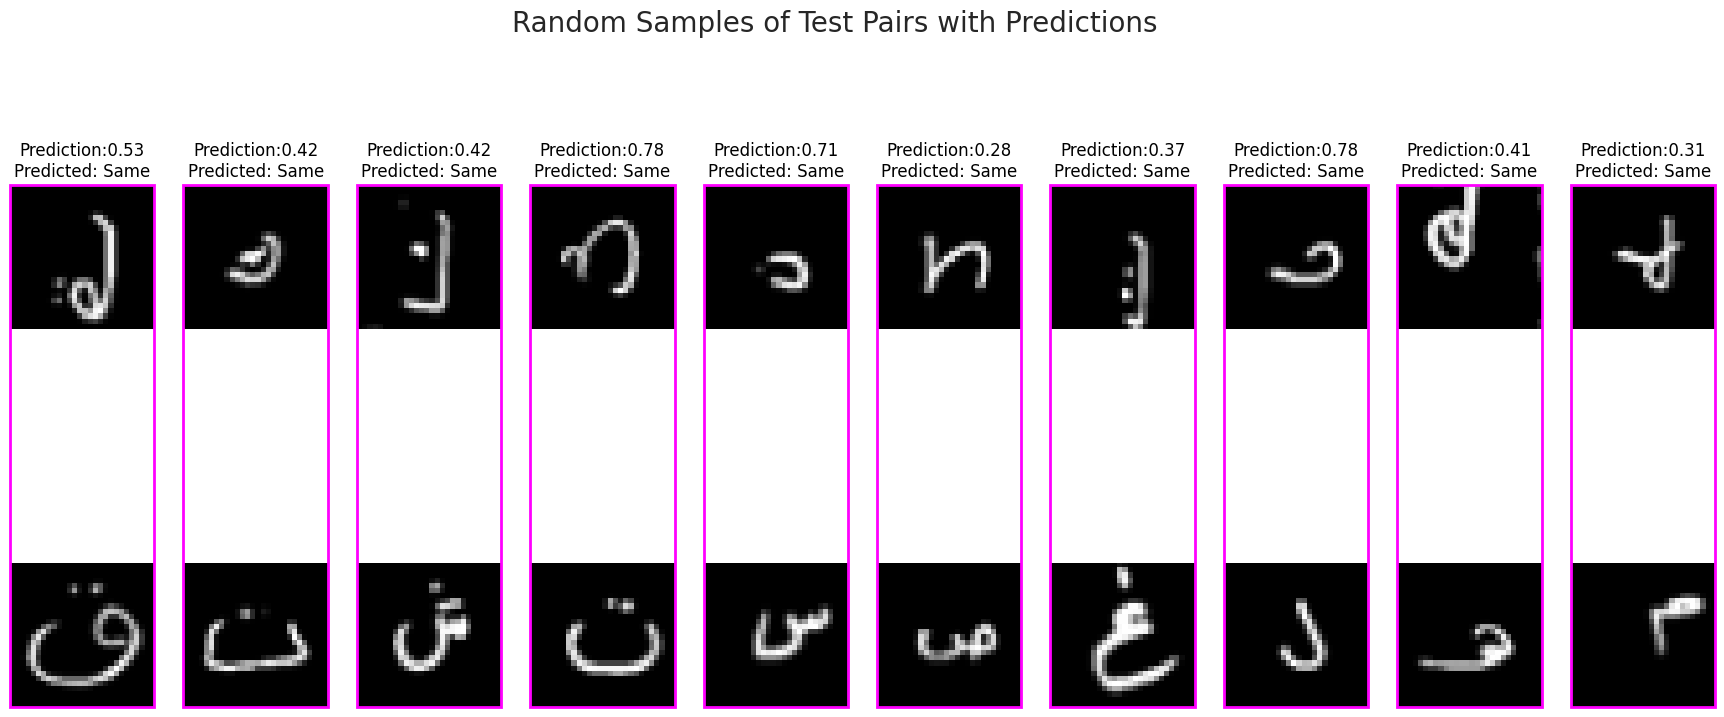

[[0.5800557 ]
 [0.45063514]
 [0.16426036]
 [0.2902208 ]
 [0.78948635]
 [0.7310159 ]
 [0.60576624]
 [0.67090046]
 [0.9413035 ]
 [0.40011108]] [[1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]]


In [224]:
import random
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Assuming you have the necessary variables: pairs_test, labels_test, best_model1001, predicted_labels

# Calculate predictions using the best_model1001
predictions = best_model.predict([pairs_test[:, 0], pairs_test[:, 1]])

# Set a threshold for classifying pairs as matching or non-matching
threshold = 0.5  # You can adjust this threshold as needed

# Create an array to store the predicted labels
predicted_labels = (predictions > threshold).astype(int)

# Choose a random set of test pairs to visualize
num_samples_to_plot = 10  # You can change this value

plt.figure(figsize=(22, 9))
plt.suptitle('Random Samples of Test Pairs with Predictions', fontsize=20)

for i in range(num_samples_to_plot):
    index = random.randint(0, len(pairs_test) - 1)
    pair = pairs_test[index]
    true_label = labels_test[index]
    predicted_labels = (predictions > threshold).astype(int)

   # Plot the first image in the pair (top)
    ax1 = plt.subplot(2, num_samples_to_plot, i + 1)
    plt.imshow(pair[0], cmap='gray')
    # plt.title(f'True Label: {true_label}\nPrediction: {predictions[index][0]:.2f}\nPredicted: {"Same" if ((predicted_label == true_label)
    # and (predicted_label >= 0.5) and true_label==1)}) else "Different"}',
    #           fontsize=12, color='black', loc='center', pad=10)  # Center-align the text with some padding
    plt.title(f'Prediction:{predictions[index][0]:.2f}\nPredicted: {"Same" if predicted_label == 1 else "Different"}',
              fontsize=12, color='black')
    plt.axis('off')

    # Plot the second image in the pair (bottom), using np.squeeze() to remove extra dimension
    ax2 = plt.subplot(2, num_samples_to_plot, i + num_samples_to_plot + 1)
    plt.imshow(np.squeeze(pair[1]).T, cmap='gray')  # Squeeze and transpose to rotate
    plt.axis('off')

    # Get the position of the subplots
    pos1 = ax1.get_position()
    pos2 = ax2.get_position()

    # Calculate the new rectangle dimensions based on the two subplot positions
    rect_x = pos1.x0
    rect_y = pos2.y0
    rect_width = pos1.width
    rect_height = pos1.y1 - pos2.y0

    # Add the rectangle to the figure around both subplots
    rect = patches.Rectangle(
        (rect_x, rect_y), rect_width, rect_height,
        linewidth=2, edgecolor='magenta', facecolor='none'
    )
    plt.gcf().add_artist(rect)

plt.tight_layout(rect=[1, 0, 1, 0.96])
plt.show()

print(predictions[:10], predicted_labels[:10])


25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


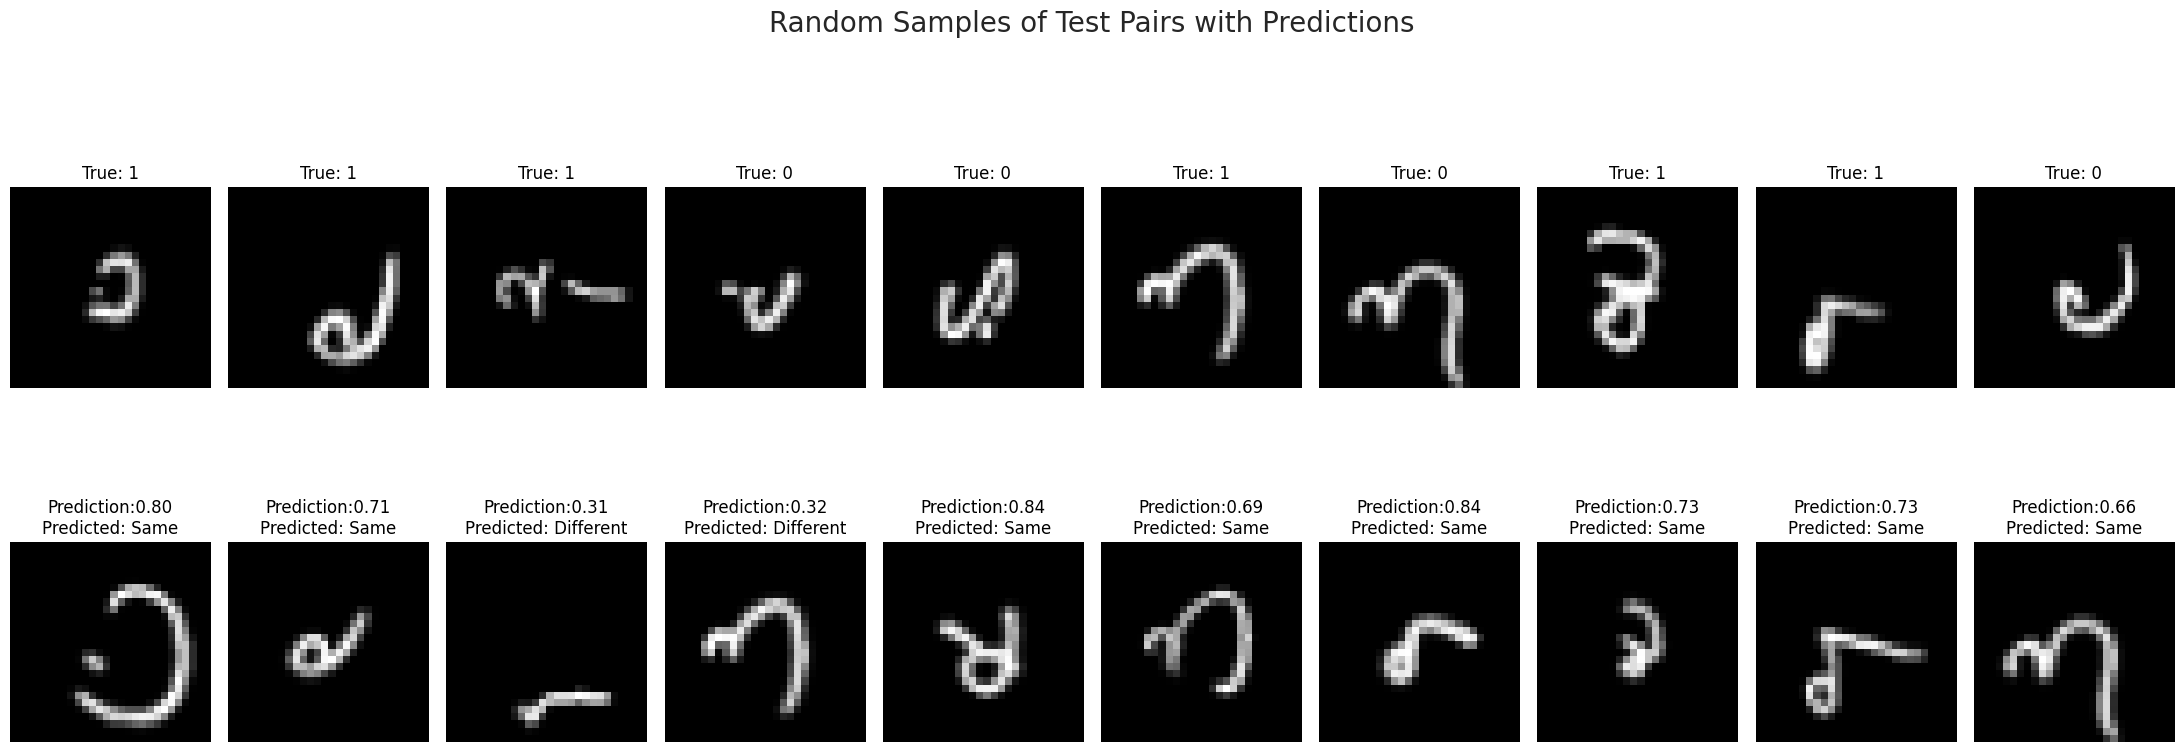

[[0.5800557 ]
 [0.45063514]
 [0.16426036]
 [0.2902208 ]
 [0.78948635]
 [0.7310159 ]
 [0.60576624]
 [0.67090046]
 [0.9413035 ]
 [0.40011108]] [[1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]]


In [223]:
import random
import matplotlib.pyplot as plt

# Assuming you have the necessary variables: pairs_test, labels_test, best_model1001, predicted_labels

# Calculate predictions using the best_model1001
predictions = best_model.predict([pairs_test[:, 0], pairs_test[:, 1]])

# Set a threshold for classifying pairs as matching or non-matching
threshold = 0.5  # You can adjust this threshold as needed

# Create an array to store the predicted labels
predicted_labels = (predictions > threshold).astype(int)

# Choose a random set of test pairs to visualize
num_samples_to_plot = 10  # You can change this value

plt.figure(figsize=(22, 9))
plt.suptitle('Random Samples of Test Pairs with Predictions', fontsize=20)

for i in range(num_samples_to_plot):
    index = random.randint(0, len(pairs_test) - 1)
    pair = pairs_test[index]
    true_label = labels_test[index]
    predicted_label = predicted_labels[index][0]

    # Create a colorful picture with the two numbers and their labels
    plt.subplot(2, num_samples_to_plot, i + 1)
    plt.imshow(pair[0], cmap='gray')  # Use 'gray' colormap for numbers
    plt.title(f'True: {true_label}', fontsize=12, color='black')
    plt.axis('off')

    plt.subplot(2, num_samples_to_plot, i + num_samples_to_plot + 1)
    plt.imshow(pair[1], cmap='gray')  # Use 'gray' colormap for numbers
    plt.title(f'Prediction:{predictions[index][0]:.2f}\nPredicted: {"Same" if predicted_label == 1 else "Different"}',
              fontsize=12, color='black')
    plt.axis('off')

plt.tight_layout()
plt.show()

print(predictions[:10], predicted_labels[:10])


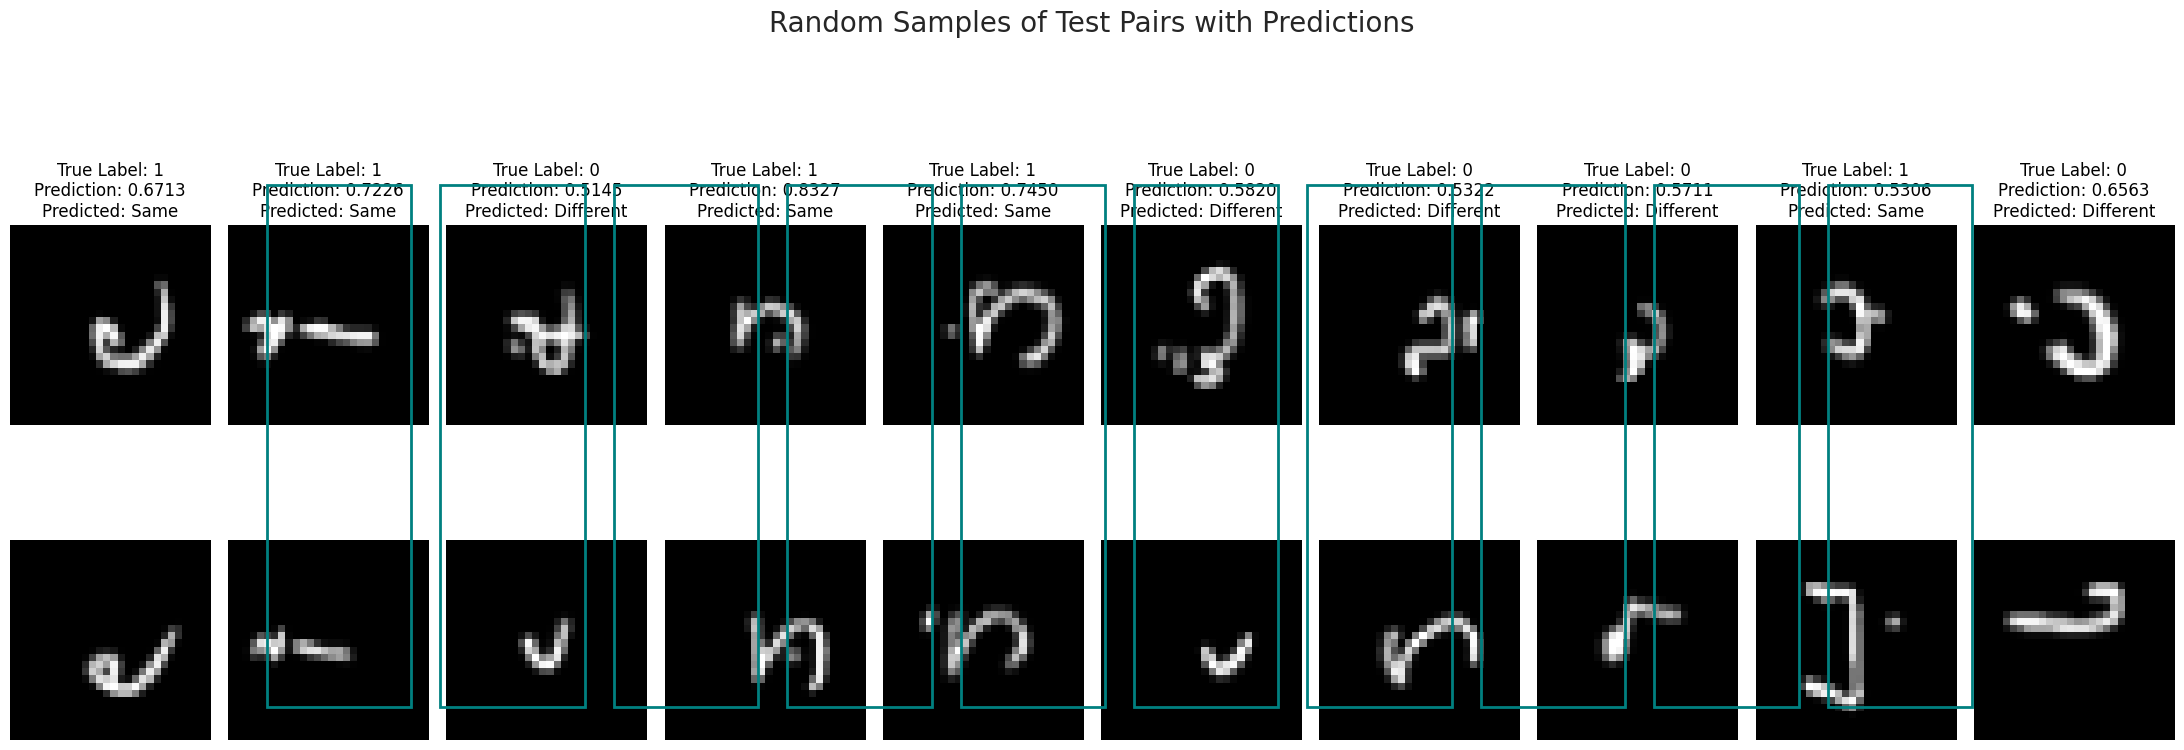

Sample Predictions and Labels:
Predictions: [[0.14539841]
 [0.32550645]
 [0.694633  ]
 [0.6136765 ]
 [0.4489312 ]
 [0.7599133 ]
 [0.5797572 ]
 [0.49029362]
 [0.57253104]
 [0.73518735]]
Predicted Labels: [[0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]]


In [187]:
import random
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Assuming you have the necessary variables: pairs_test, labels_test, best_model1001


# Set a threshold for classifying pairs as matching or non-matching
threshold = 0.5  # You can adjust this threshold as needed

# Create an array to store the predicted labels
predicted_labels = (predictions > threshold).astype(int)

# Choose a random set of test pairs to visualize
num_samples_to_plot = 10  # You can change this value

plt.figure(figsize=(22, 9))
plt.suptitle('Random Samples of Test Pairs with Predictions', fontsize=20)

for i in range(num_samples_to_plot):
    index = random.randint(0, len(pairs_test) - 1)
    pair = pairs_test[index]
    true_label = labels_test[index]
    prediction_value = predictions[index][0]
    predicted_label = 1 if prediction_value > threshold else 0

    # Determine predicted category
    predicted_category = (
        "Same" if predicted_label == true_label and
        ((predicted_label == 1 and prediction_value >= threshold) or
         (predicted_label == 0 and prediction_value < threshold))
        else "Different"
    )

    # Plot the first image in the pair (top)
    ax1 = plt.subplot(2, num_samples_to_plot, i + 1)
    plt.imshow(pair[0], cmap='gray')
    plt.title(
        f'True Label: {true_label}\n'
        f'Prediction: {prediction_value:.4f}\n'
        f'Predicted: {predicted_category}',
        fontsize=12, color='black'
    )
    plt.axis('off')

    # Plot the second image in the pair (bottom)
    ax2 = plt.subplot(2, num_samples_to_plot, i + num_samples_to_plot + 1)
    plt.imshow(pair[1], cmap='gray')
    plt.axis('off')

    # Get the position of the subplots
    pos1 = ax1.get_position()
    pos2 = ax2.get_position()

    # Calculate the rectangle dimensions
    rect_x = pos1.x0  # X position (left boundary)
    rect_y = pos2.y0  # Y position (bottom boundary)
    rect_width = pos1.width  # Width of the rectangle
    rect_height = pos1.y1 - pos2.y0  # Total height to cover both subplots

    # Add the rectangle to the figure
    rect = patches.Rectangle(
        (rect_x, rect_y), rect_width, rect_height,
        linewidth=2, edgecolor='teal', facecolor='none'
    )
    plt.gcf().add_artist(rect)

# Adjust layout for better visualization
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

# Print sample predictions and labels
print("Sample Predictions and Labels:")
print("Predictions:", predictions[:10])
print("Predicted Labels:", predicted_labels[:10])


25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


<ipython-input-191-772b93401ebc>:61: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout(rect=[1, 0, 1, 0.96])


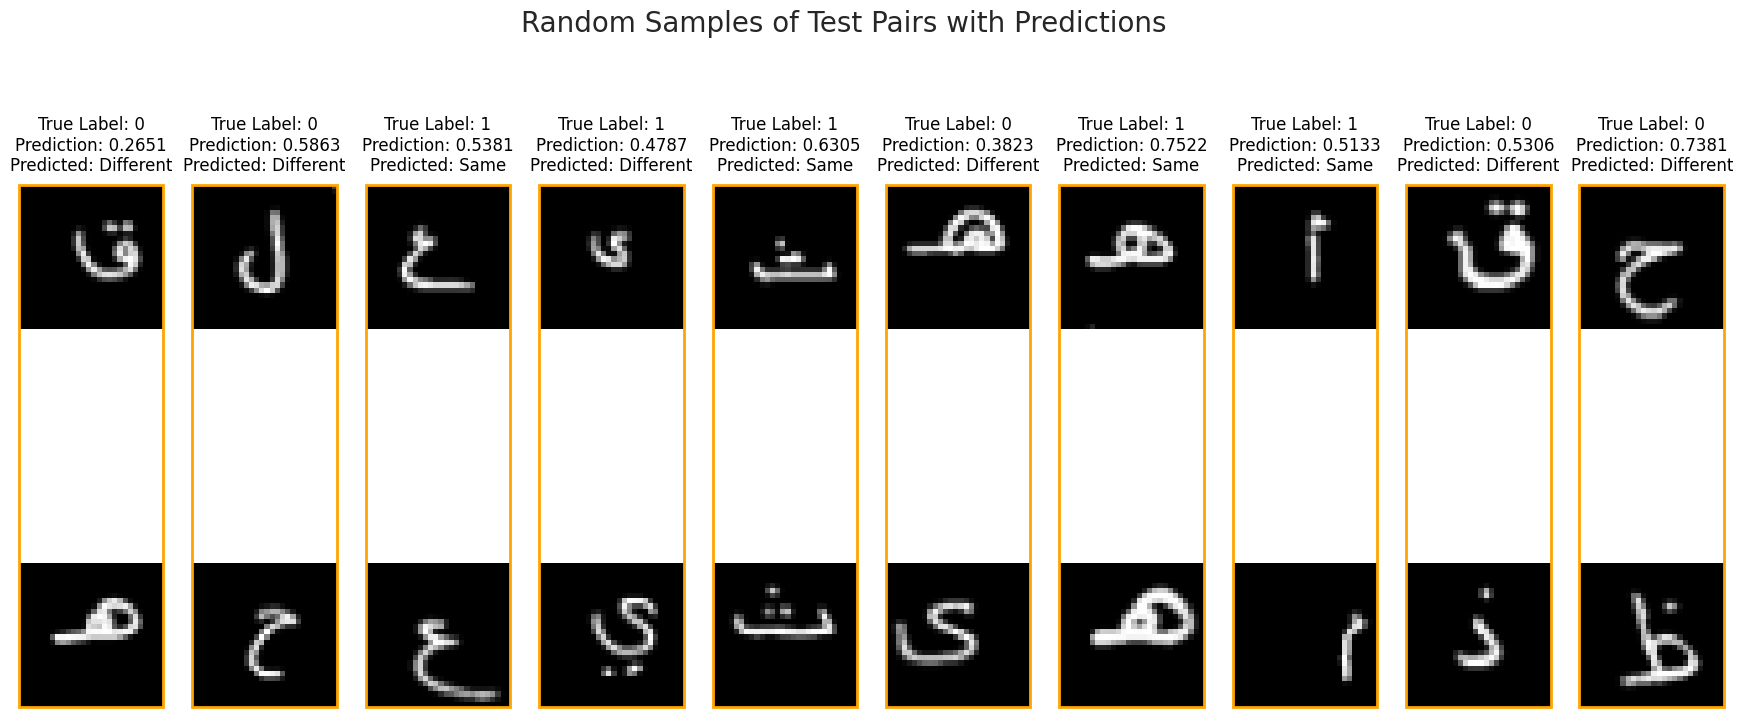

[[0.14539841]
 [0.32550645]
 [0.694633  ]
 [0.6136765 ]
 [0.4489312 ]
 [0.7599133 ]
 [0.5797572 ]
 [0.49029362]
 [0.57253104]
 [0.73518735]] [[0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]]


In [191]:
import random
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Assuming you have the necessary variables: pairs_test, labels_test, best_model1001, predicted_labels

# Calculate predictions using the best_model1001
predictions = best_model.predict([pairs_test[:, 0], pairs_test[:, 1]])
# Set a threshold for classifying pairs as matching or non-matching
threshold = 0.5  # You can adjust this threshold as needed

# Create an array to store the predicted labels
predicted_labels = (predictions > threshold).astype(int)

# Choose a random set of test pairs to visualize
num_samples_to_plot = 10  # You can change this value

plt.figure(figsize=(22, 9))
plt.suptitle('Random Samples of Test Pairs with Predictions', fontsize=20)

for i in range(num_samples_to_plot):
    index = random.randint(0, len(pairs_test) - 1)
    pair = pairs_test[index]
    true_label = labels_test[index]
    predicted_label = predicted_labels[index][0]

    # Plot the first image in the pair (top), using np.squeeze() to remove extra dimension
    ax1 = plt.subplot(2, num_samples_to_plot, i + 1)
    plt.imshow(np.squeeze(pair[0]).T, cmap='gray')  # Squeeze and transpose to rotate
    plt.title(
    f'True Label: {true_label}\n'
    f'Prediction: {predictions[index][0]:.4f}\n'
    f'Predicted: {"Same" if (predictions[index][0] >= threshold and true_label == 1) else "Different"}',
    fontsize=12, color='black', loc='center', pad=10
)
    plt.axis('off')

    # Plot the second image in the pair (bottom), using np.squeeze() to remove extra dimension
    ax2 = plt.subplot(2, num_samples_to_plot, i + num_samples_to_plot + 1)
    plt.imshow(np.squeeze(pair[1]).T, cmap='gray')  # Squeeze and transpose to rotate
    plt.axis('off')

    # Get the position of the subplots
    pos1 = ax1.get_position()
    pos2 = ax2.get_position()

    # Calculate the new rectangle dimensions based on the two subplot positions
    rect_x = pos1.x0
    rect_y = pos2.y0
    rect_width = pos1.width
    rect_height = pos1.y1 - pos2.y0

    # Add the rectangle to the figure around both subplots
    rect = patches.Rectangle(
        (rect_x, rect_y), rect_width, rect_height,
        linewidth=2, edgecolor='orange', facecolor='none'
    )
    plt.gcf().add_artist(rect)

plt.tight_layout(rect=[1, 0, 1, 0.96])
plt.show()

print(predictions[:10], predicted_labels[:10])


25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


<ipython-input-197-9dc9adb91b27>:81: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout(rect=[1, 0, 1, 0.96])


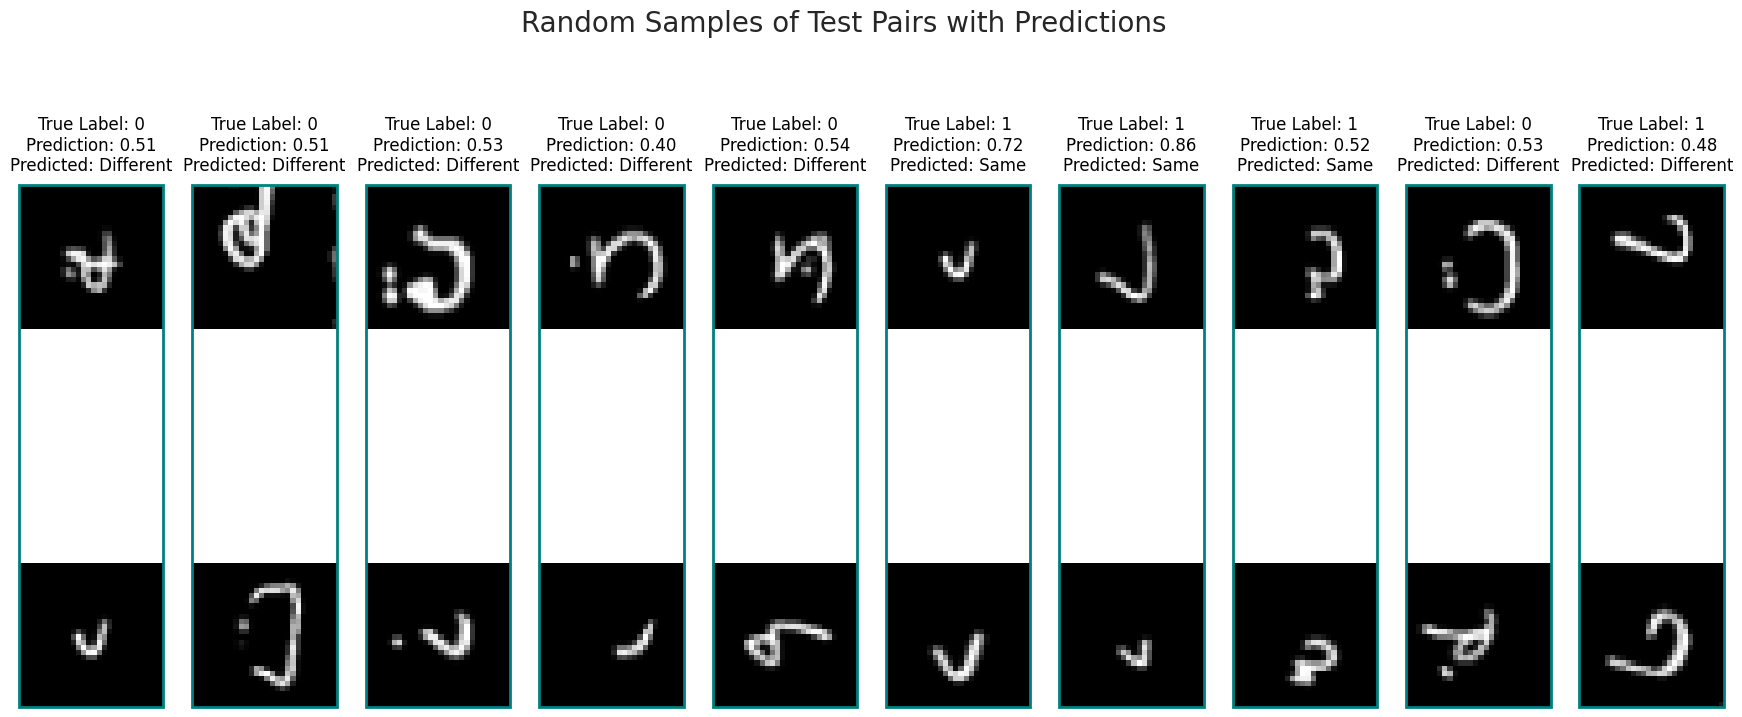

[[0.14539841]
 [0.32550645]
 [0.694633  ]
 [0.6136765 ]
 [0.4489312 ]
 [0.7599133 ]
 [0.5797572 ]
 [0.49029362]
 [0.57253104]
 [0.73518735]] [[0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]]


In [197]:
import random
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Assuming you have the necessary variables: pairs_test, labels_test, best_model1001, predicted_labels

# Calculate predictions using the best_model1001
predictions = best_model.predict([pairs_test[:, 0], pairs_test[:, 1]])

# Set a threshold for classifying pairs as matching or non-matching
threshold = 0.5  # You can adjust this threshold as needed

# Create an array to store the predicted labels
predicted_labels = (predictions > threshold).astype(int)

# Choose a random set of test pairs to visualize
num_samples_to_plot = 10  # You can change this value

plt.figure(figsize=(22, 9))
plt.suptitle('Random Samples of Test Pairs with Predictions', fontsize=20)

for i in range(num_samples_to_plot):
    index = random.randint(0, len(pairs_test) - 1)
    pair = pairs_test[index]
    true_label = labels_test[index]
    predicted_label = predicted_labels[index][0]

    # # Plot the first image in the pair (top)
    # ax1 = plt.subplot(2, num_samples_to_plot, i + 1)
    # plt.imshow(pair[0], cmap='gray')
    # # plt.title(f'True Label: {true_label}', fontsize=12, color='black')
    # plt.title(f'True Label: {true_label}\nPrediction: {predictions[index][0]:.2f}\nPredicted: {"Same" if predicted_label == 1 else "Different"}', fontsize=12, color='black')

    # plt.axis('off')

    # # Plot the second image in the pair (bottom)
    # ax2 = plt.subplot(2, num_samples_to_plot, i + num_samples_to_plot + 1)
    # plt.imshow(pair[1], cmap='gray')
    # # plt.title(f'Prediction: {predictions[index][0]:.2f}\nPredicted: {"Same" if predicted_label == 1 else "Different"}',
    # #           fontsize=12, color='black')
    # plt.axis('off')

    # Plot the first image in the pair (top)
    ax1 = plt.subplot(2, num_samples_to_plot, i + 1)
    plt.imshow(pair[0], cmap='gray')
    # plt.title(f'True Label: {true_label}\nPrediction: {predictions[index][0]:.2f}\nPredicted: {"Same" if ((predicted_label == true_label)
    # and (predicted_label >= 0.5) and true_label==1)}) else "Different"}',
    #           fontsize=12, color='black', loc='center', pad=10)  # Center-align the text with some padding
    plt.title(
    f'True Label: {true_label}\n'
    f'Prediction: {predictions[index][0]:.2f}\n'
    f'Predicted: {"Same" if (predicted_label >= 0.5 and true_label == 1) else "Different"}',
    fontsize=12, color='black', loc='center', pad=10
)

    plt.axis('off')

    # Plot the second image in the pair (bottom) with aligned prediction info
    ax2 = plt.subplot(2, num_samples_to_plot, i + num_samples_to_plot + 1)
    plt.imshow(pair[1], cmap='gray')
    plt.axis('off')


    # Get the position of the subplots
    pos1 = ax1.get_position()
    pos2 = ax2.get_position()

    # Calculate the new rectangle dimensions based on the two subplot positions
    rect_x = pos1.x0  # X position (left boundary)
    rect_y = pos2.y0  # Y position (bottom boundary)
    rect_width = pos1.width  # Width of the rectangle (same as the subplot)
    rect_height = pos1.y1 - pos2.y0  # Total height to cover both subplots

    # Add the rectangle to the figure around both subplots
    rect = patches.Rectangle(
        (rect_x, rect_y), rect_width, rect_height,
        linewidth=2, edgecolor='teal', facecolor='none'
    )
    plt.gcf().add_artist(rect)

plt.tight_layout(rect=[1, 0, 1, 0.96])
plt.show()

print(predictions[:10], predicted_labels[:10])


25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


<ipython-input-170-95976bf19780>:81: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout(rect=[1, 0, 1, 0.96])


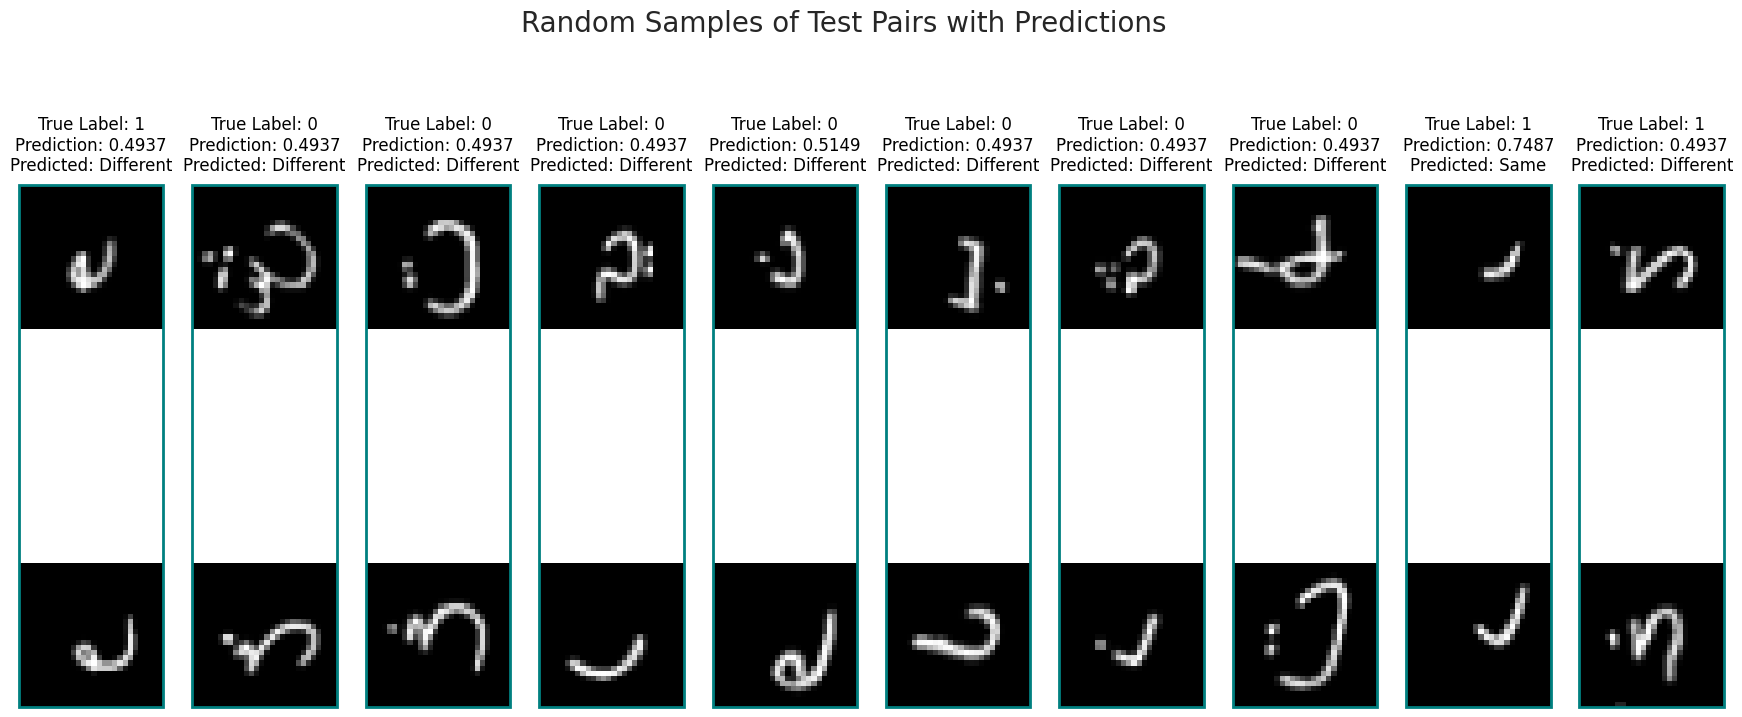

[[0.4937264]
 [0.4937264]
 [0.4937264]
 [0.4937264]
 [0.4937264]
 [0.4937264]
 [0.4937264]
 [0.4937264]
 [0.4937264]
 [0.4937264]] [[0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]]


In [170]:
import random
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Assuming you have the necessary variables: pairs_test, labels_test, best_model1001, predicted_labels

# Calculate predictions using the best_model1001
predictions = best_model.predict([pairs_test[:, 0], pairs_test[:, 1]])

# Set a threshold for classifying pairs as matching or non-matching
threshold = 0.5  # You can adjust this threshold as needed

# Create an array to store the predicted labels
predicted_labels = (predictions > threshold).astype(int)

# Choose a random set of test pairs to visualize
num_samples_to_plot = 10  # You can change this value

plt.figure(figsize=(22, 9))
plt.suptitle('Random Samples of Test Pairs with Predictions', fontsize=20)

for i in range(num_samples_to_plot):
    index = random.randint(0, len(pairs_test) - 1)
    pair = pairs_test[index]
    true_label = labels_test[index]
    predicted_label = predicted_labels[index][0]

    # # Plot the first image in the pair (top)
    # ax1 = plt.subplot(2, num_samples_to_plot, i + 1)
    # plt.imshow(pair[0], cmap='gray')
    # # plt.title(f'True Label: {true_label}', fontsize=12, color='black')
    # plt.title(f'True Label: {true_label}\nPrediction: {predictions[index][0]:.2f}\nPredicted: {"Same" if predicted_label == 1 else "Different"}', fontsize=12, color='black')

    # plt.axis('off')

    # # Plot the second image in the pair (bottom)
    # ax2 = plt.subplot(2, num_samples_to_plot, i + num_samples_to_plot + 1)
    # plt.imshow(pair[1], cmap='gray')
    # # plt.title(f'Prediction: {predictions[index][0]:.2f}\nPredicted: {"Same" if predicted_label == 1 else "Different"}',
    # #           fontsize=12, color='black')
    # plt.axis('off')

    # Plot the first image in the pair (top)
    ax1 = plt.subplot(2, num_samples_to_plot, i + 1)
    plt.imshow(pair[0], cmap='gray')
    # plt.title(f'True Label: {true_label}\nPrediction: {predictions[index][0]:.2f}\nPredicted: {"Same" if ((predicted_label == true_label)
    # and (predicted_label >= 0.5) and true_label==1)}) else "Different"}',
    #           fontsize=12, color='black', loc='center', pad=10)  # Center-align the text with some padding
    plt.title(
    f'True Label: {true_label}\n'
    f'Prediction: {predictions[index][0]:.4f}\n'
    f'Predicted: {"Same" if (predicted_label >= 0.5 and true_label == 1) else "Different"}',
    fontsize=12, color='black', loc='center', pad=10
)

    plt.axis('off')

    # Plot the second image in the pair (bottom) with aligned prediction info
    ax2 = plt.subplot(2, num_samples_to_plot, i + num_samples_to_plot + 1)
    plt.imshow(pair[1], cmap='gray')
    plt.axis('off')


    # Get the position of the subplots
    pos1 = ax1.get_position()
    pos2 = ax2.get_position()

    # Calculate the new rectangle dimensions based on the two subplot positions
    rect_x = pos1.x0  # X position (left boundary)
    rect_y = pos2.y0  # Y position (bottom boundary)
    rect_width = pos1.width  # Width of the rectangle (same as the subplot)
    rect_height = pos1.y1 - pos2.y0  # Total height to cover both subplots

    # Add the rectangle to the figure around both subplots
    rect = patches.Rectangle(
        (rect_x, rect_y), rect_width, rect_height,
        linewidth=2, edgecolor='teal', facecolor='none'
    )
    plt.gcf().add_artist(rect)

plt.tight_layout(rect=[1, 0, 1, 0.96])
plt.show()

print(predictions[:10], predicted_labels[:10])
